<a href="https://colab.research.google.com/github/yonggeunoh/python/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 기초 과제

- 아래 각 문제에 대해 새로운 입력셀을 생성하고 파이썬 명령어를 실행하여 답안 작성
- 파이썬 명령어와 실행 결과가 표시된 주피터노트북을 pdf 파일로 export('파일-인쇄-pdf로 저장')하여 제출
- 파일 이름은 '파이썬 기초_이름_행번.pdf'로 저장

# 1. list comprehension 이용

#### 아래 국가명 리스트와 연도 리스트를 이용하여 국가명_연도 문자열을 생성하라
#### 아래 리스트와 인덱스를 이용하여 중국, 호주에 대해서만 국가명_연도 문자열을 생성하라

In [2]:
countries = ['KOR', 'USA', 'JPN', 'CHN', 'AUS', 'MEX']
year = [17, 18, 19, 20]

In [44]:
%pprint

Pretty printing has been turned OFF


In [45]:

cy = [c + '_' + str(y) for c in countries for y in year]
cy

['KOR_17', 'KOR_18', 'KOR_19', 'KOR_20', 'USA_17', 'USA_18', 'USA_19', 'USA_20', 'JPN_17', 'JPN_18', 'JPN_19', 'JPN_20', 'CHN_17', 'CHN_18', 'CHN_19', 'CHN_20', 'AUS_17', 'AUS_18', 'AUS_19', 'AUS_20', 'MEX_17', 'MEX_18', 'MEX_19', 'MEX_20']

In [46]:
cy2 = [c + '_' + str(y) for c in countries if c  in ['CHN', 'AUS'] for y in year]
cy2

['CHN_17', 'CHN_18', 'CHN_19', 'CHN_20', 'AUS_17', 'AUS_18', 'AUS_19', 'AUS_20']

#### 아래 문자열 리스트에서 숫자로 이루어진 문자열(-5 포함)만 선택하여 리스트를 생성하라

In [47]:
strings = ['KOR', '한국', '15', "True", '1000', '-5']
nums = [s for s in strings if s.strip('-').isnumeric()]
nums

['15', '1000', '-5']

# 2. 아래 국가명 리스트와 연도 리스트, for-loop, if-else 구문을 이용하여 국가명_연도 문자열을 생성하라

In [48]:
countries = ['KOR', 'USA', 'JPN', 'CHN', 'AUS', 'MEX']
year = [17, 18, 19, 20]

In [52]:
countries2 = []
for co in countries:
    for yr in year:
      if co in ['CHN', 'AUS']:
        countries2 = countries2 + [co + '_' + str(yr)]
      else:
          pass;
countries2


['CHN_17', 'CHN_18', 'CHN_19', 'CHN_20', 'AUS_17', 'AUS_18', 'AUS_19', 'AUS_20']

#### 힌트

In [ ]:
# countries2 = []
# for co in :
#     for yr in :
#         countries2 = countries2 + [co + '_' + str(yr)]

# 3. 아래 식을 참고하여 $\hat(\beta)$를 계산하는 함수를 정의하고, $X, y$를 생성한 다음 선형회귀모형의 계수를 추정하시오

$y = X \beta + u$ with $u \sim norm(0, 1/2)$

$y$는 $n \times 1$ 종속변수 벡터, $X$는 $n \times p$ 설명변수 매트릭스, $\beta$는 $p \times 1$ 계수 벡터, $u$는 $\times 1$ 비관측 요인 벡터

$x_{1,t}=1$,

$x_{2,t}=0.5 \times x_{2,t-1} + \varepsilon_2$ with $x_{2,0} = 1$ and $\varepsilon_2 \sim norm(0,1)$


$x_{3,t}=0.2 \times x_{3,t-1} + 2\varepsilon_3$ with $x_{3,0} = 2$ and $\varepsilon_3 \sim norm(0,1)$

$\beta = [1, 2, 3]$

#### 힌트

$\hat{\beta} = (X'X)^{-1}X'y $

In [53]:
import numpy as np
from numpy.linalg import inv

def beta_hat(y, X):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

N = 100
x1 = np.ones(N) * 1
x2 = np.ones(N) * 1
x3 = np.ones(N) * 2

for t in range(1, N):
    x2[t] = 0.5 * x2[t-1] + np.random.randn()
    x3[t] = 0.2 * x3[t-1] + np.random.randn()

X = np.array([x1, x2, x3]).T
beta = np.array([1, 2, 3])

y = X.dot(beta) + np.random.randn(N)

beta_hat(y, X)

array([0.97202308, 1.94924619, 2.95670777])

In [ ]:
# import numpy as np
# from numpy.linalg import inv

# def beta_hat(y, X):
#     return inv(X.T.dot(X)).dot(X.T).dot(y)

# N = 
# x1 = np.ones(N) * 1
# x2 = np.ones(N) * 1
# x3 = np.ones(N) * 

# for t in range(1, N):
#     x2[t] = 0.5 * x2[t-1] + np.random.randn()
#     x3[t] = 0.2 * x3[t-1] + np.random.randn()

# X = np.array([x1, x2, x3]).T
# beta = np.array([1, 2, 3])

# y = X.dot(beta) + np.random.randn(N)

# beta_hat(y, X)

# 4. 연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 생성하시오
(인덱스 첫번째 레벨은은 연도, 두번째 레벨은은 국가명. 칼럼은  [gdp, inf],
경제성장률과 물가상승률은 넘파이 랜덤표본 이용)

- 2018년 이후 한국과 미국의 연도별 평균경제성장률을 계산하라
- 중국(cn)의 경제성장률과 물가상승률 데이터프레임을 같은 방식으로 생성하여 결합하라

In [59]:
# 연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 생성
import pandas as pd
ex1 = pd.DataFrame({'yr':list(range(2017, 2021)) *3
                  , 'country':['kr'] * 4 +  ['us'] * 4 + ['jp'] * 4
                  , 'gdp':np.random.randn(12) + 1
                  , 'inf':np.random.randn(12) + 2 })

ex1.set_index(['yr', 'country'], inplace=True)
ex1 = ex1.sort_index(axis = 0)
ex1

gdp       inf
yr   country                    
2017 jp       0.213691  0.462080
     kr       0.526158  2.258165
     us       2.536417  1.499969
2018 jp       1.562867  3.043316
     kr      -0.546824  1.381860
     us       0.676945  2.170072
2019 jp       1.047889  0.189574
     kr       0.509726  3.132870
     us       0.540262  2.753484
2020 jp       0.270100  1.717424
     kr       1.485632  2.203267
     us       1.452541 -0.111866

In [60]:
# 2018년 이후 한국과 미국의 연도별 평균경제성장률을 계산
ex1 = ex1.unstack()
ex1.loc[2018:].mean()
ex1['gdp'].loc[2018:, ['kr', 'us']].mean(axis = 1)

yr
2018    0.065060
2019    0.524994
2020    1.469087
dtype: float64

In [61]:
# 중국(cn)의 경제성장률과 물가상승률 데이터프레임을 같은 방식으로 생성하여 결합
cn = pd.DataFrame({'yr':list(range(2017, 2021)) * 1, 'country':['cn'] * 4,
                    'gdp':np.random.randn(4) + 1, 'inf':np.random.randn(4) + 2})
ex1 = ex1.stack()
ex1 = ex1.reset_index()
ex2 = pd.concat([ex1, cn], axis = 0)
ex2 = ex2.set_index(['yr', 'country']).unstack()
ex2

gdp                      ...       inf                    
country        cn        jp        kr  ...        jp        kr        us
yr                                     ...                              
2017     1.172623  0.213691  0.526158  ...  0.462080  2.258165  1.499969
2018     0.415566  1.562867 -0.546824  ...  3.043316  1.381860  2.170072
2019     1.430391  1.047889  0.509726  ...  0.189574  3.132870  2.753484
2020     1.723430  0.270100  1.485632  ...  1.717424  2.203267 -0.111866

[4 rows x 8 columns]

In [ ]:
# import numpy as np

# ex1 = pd.DataFrame({'yr':list(range(2017, 2021)) * , 'country':['kr'] * 4 + 
#                     ['us'] * 4 + ['jp'] * 4, 'gdp':np.random.randn(12) + 1, 
#                     'inf':np.random.randn(12) + 2})
# ex1 = ex1.set_index( )
# ex1 = ex1.sort_index(axis = )
# ex1.loc[2018:]

In [ ]:
# ex1 = ex1.unstack()
# ex1.loc[2018:].mean()
# ex1['gdp'].loc[2018:, ['kr', 'us']].mean(axis = 1)
# cn = pd.DataFrame({'yr':list(range(2017, 2021)) * 1, 'country':['cn'] * 4,
#                    'gdp':np.random.randn(4) + 1, 'inf':np.random.randn(4) + 2})
# ex1 = ex1.stack()
# ex1 = ex1.reset_index()
# ex2 = pd.concat([ex1, cn], axis = 0)
# ex2 = ex2.set_index(['yr', 'country']).unstack()
# ex2m = ex2.groupby(level = 0, axis = 1).mean()
# ex2m['country'] = 'mean'
# ex2m = ex2m.set_index('country', append=True)
# ex2m = ex2m.unstack()
# ex3 = pd.concat([ex2, ex2m], axis = 1)
# ex3.loc[ex3.loc[:, idx['gdp', 'mean']].ge(0.8)]

# 5. 성인 500명에 대한 키(cm)와 몸무게(kg) 데이터를 아래 관계에 따라 생성하시오

$height \sim norm(170, 15)$

$weight = (height - 100)^{1.2} + u$, $u \sim norm(0, 5)$

- 키와 몸무게 각각에 대한 히스토그램(5 kg/cm 구간)을 subplots을 이용하여 그리시오

- 키 180cm 이상 및 이하로 그룹을 나누어 키와 몸무게의 산포도를 그리시오

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 500
h = np.random.randn(N) * 15 + 170
w = (h - 100)**1.1+ np.random.randn(N)
hw = pd.DataFrame({'h':h, 'w':w})

print(hw.min())
print(hw.max())

h    129.261135
w     40.013583
dtype: float64
h    211.226669
w    177.720518
dtype: float64


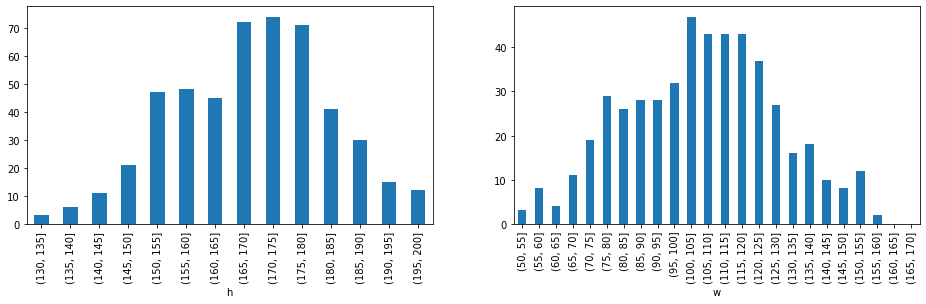

In [69]:
# 키와 몸무게 각각에 대한 히스토그램(5 kg/cm 구간)을 subplots을 이용하여 그리시오
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
hw.groupby(pd.cut(hw.h, list(range(130, 205, 5))))['h'].count().plot.bar(ax=ax[0])
hw.groupby(pd.cut(hw.w, list(range(50,  175, 5))))['w'].count().plot.bar(ax=ax[1])


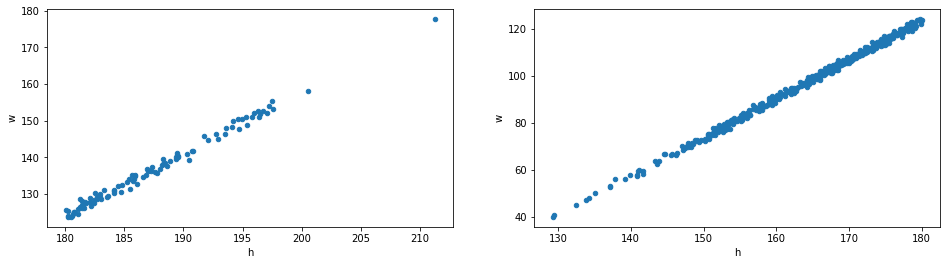

In [68]:
# 키 180cm 이상 및 이하로 그룹을 나누어 키와 몸무게의 산포도를 그리시오
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
hw.loc[hw.h.ge(180)].plot.scatter(x='h', y='w', ax=ax[0])
hw.loc[hw.h.lt(180)].plot.scatter(x='h', y='w', ax=ax[1])

#### 힌트

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# N = 100
# h = np.random.randn(N) * 15 + 170
# w = (h - 100)**1.1 + np.random.randn(N)

# hw = pd.DataFrame({'h':h, 'w':w})
# hw.max()
# hw.min()

# fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# hw.groupby(pd.cut(hw.h, list(range(130, 205, 5))))['h'].count().plot.bar(ax=ax[0])
# hw.groupby(pd.cut(hw.w, list(range(50, ))))['w'].count().plot.bar(ax=ax[1])

# fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# hw.loc[hw.h.ge(180)].plot.scatter(x='h', y='w', ax=ax[0])
# hw.loc[hw.h.lt(180)].plot.scatter(x='h', y='w', ax=ax[1])

# (optional) 2000~2020년중 국가별 주택가격 변화를 분석하고자 한다.(20개 이상 국가 포함)

- BIS statistics의 주택가격 데이터를 이용하여여 2014년 이후 주택가격 상승률이 가장 높은 3개, 가장 낮은 3개 국가의 주택가격 추이를 그래프로 그리시오.

- BIS statistics의 주택가격 데이터를 포함하여, 국가별 주택가격에 영향을 미치는 3개 이상 설명변수를 2개 이상 데이터 출처에서 입수하여 하나의 데이터프레임으로 정리하고, 스타타 파일 포맷으로 export하시오. 


In [2]:
pip install country_converter

     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.4-py3-none-any.whl size=53543 sha256=6391c46199167f8e63c7c4180fcc09956914531085a1ab0c0a6b5f824f6fe468
  Stored in directory: /root/.cache/pip/wheels/69/cf/84/9ebca78737327440a0bb5faa6d0380e9017730534cf0dbcb8c
Successfully built country-converter


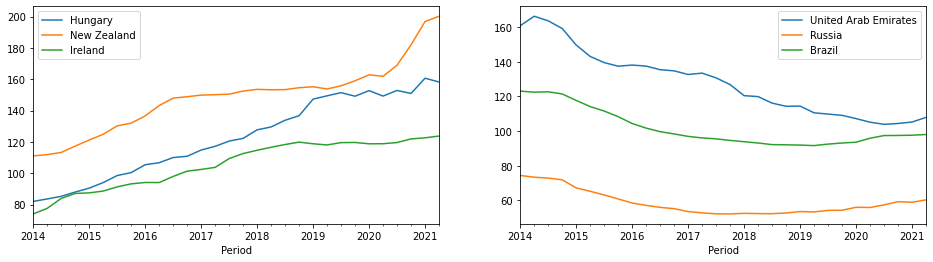

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import country_converter as coco
df = pd.read_excel('https://www.bis.org/statistics/pp/pp_selected.xlsx', sheet_name='Quarterly Series', skiprows=3, index_col=0)
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())
# R:Real, 628:Index, 2010 = 100
df = df.loc[:, (df.columns.get_level_values(2)=='R' )& (df.columns.get_level_values(3)=='628' )]
df.columns = df.columns.droplevel([0,2,3])

top3 = df.pct_change(30).iloc[-1, :].nlargest(3).index
bottom3 = df.pct_change(30).iloc[-1, :].nsmallest(3).index

fig, ax = plt.subplots(1, 2, figsize = (16, 4))
df.loc['2014':, top3].plot(ax=ax[0]).legend(coco.convert(names=top3, to='name_short'))
df.loc['2014':, bottom3].plot(ax=ax[1]).legend(coco.convert(names=bottom3, to='name_short'))

In [5]:
pip install pandaSDMX

     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 9.1 MB 8.5 MB/s 


In [6]:
pip install requests-cache

     |████████████████████████████████| 44 kB 1.3 MB/s 
     |████████████████████████████████| 138 kB 9.6 MB/s 
     |████████████████████████████████| 127 kB 53.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
pip install country_converter

In [9]:
import pandas as pd
import pandasdmx as sdmx

# BIS : Central bank Policy Rate #########################
# 1. Set Agency
bis = sdmx.Request('BIS')

# 2. find dataflow : Central bank policy rate
flow_msg = bis.dataflow()
dataflows = sdmx.to_pandas(flow_msg.dataflow)
dataflows[dataflows.str.contains('policy', case=False)]

# 3. set dataflow
cbpr_msg = bis.dataflow('WEBSTATS_CBPOL_M_DATAFLOW')
cbpr_flow = cbpr_msg.dataflow.WEBSTATS_CBPOL_M_DATAFLOW

# 4. Check : DSD
dsd = cbpr_flow.structure
# dsd is cbpr_msg.structure.BIS_CBPOL
# dsd.dimensions.components
# dsd.attributes.components

# 5. Check : Code list
cl = dsd.dimensions.get('FREQ').local_representation.enumerated
# cl is cbpr_msg.codelist.CL_FREQ
# sdmx.to_pandas(cl)

# 6. Check : constraints
# cr = cbpr_msg.constraint.CBP_M_24M.data_content_region[0]
# c1 = sdmx.to_pandas(cr.member['FREQ'].values)

# 7. get data
key = dict(FREQ=['M'])
params = dict(startPeriod='2014-01-01')
data_msg = bis.data('WEBSTATS_CBPOL_M_DATAFLOW', key=key,params=params)
data = data_msg.data[0]
monthly = [s for sk, s in data.series.items() if sk.FREQ == 'M']
df_cbpr = pd.concat(sdmx.to_pandas(monthly)).unstack()
df_cbpr.index = df_cbpr.index.droplevel([0])


# BIS : Consumer price #########################
bis = sdmx.Request('BIS')
dataflows = sdmx.to_pandas(bis.dataflow().dataflow)
dataflows[dataflows.str.contains('Consumer', case=False)]
cpi_msg = bis.dataflow('WEBSTATS_LONG_CPI_DATAFLOW')
cpi_flow = cpi_msg.dataflow.WEBSTATS_LONG_CPI_DATAFLOW
dsd = cpi_flow.structure
dsd.dimensions.components
# cr = cpi_msg.constraint.CPI_IDX.data_content_region[0]
# c1 = sdmx.to_pandas(cr.member['FREQ'].values)
# c2 = sdmx.to_pandas(cr.member['UNIT_MEASURE'].values)
key = dict(FREQ=['M'],UNIT_MEASURE=['628'])
params = dict(startPeriod='2014-01-01')
data_msg = bis.data('WEBSTATS_LONG_CPI_DATAFLOW', key=key,params=params)
data = data_msg.data[0]
monthly = [s for sk, s in data.series.items() ]
df_cpi = pd.concat(sdmx.to_pandas(monthly)).unstack()
df_cpi.index = df_cpi.index.droplevel([0,2])


In [11]:
pip install --upgrade certifi

In [13]:
# # ILO : Unemployment rate #########################
# ilo = sdmx.Request('ILO')
# flow_msg = ilo.dataflow()
# dataflows = sdmx.to_pandas(flow_msg.dataflow)
# dataflows[dataflows.str.contains('unemployment rate', case=False)]
# ilo_msg = ilo.dataflow('DF_UNE_DEA1_SEX_AGE_RT')
# unrt_flow = ilo_msg.dataflow.DF_UNE_DEA1_SEX_AGE_RT
# unrt_flow.structure.dimensions.components
# ilo_msg.constraint
# cr = ilo_msg.constraint.CCA_DF_UNE_DEA1_SEX_AGE_RT.data_content_region[0]
# c1 = sdmx.to_pandas(cr.member['REF_AREA'].values)
# c2 = sdmx.to_pandas(cr.member['FREQ'].values)
# c3 = sdmx.to_pandas(cr.member['MEASURE'].values)
# c4 = sdmx.to_pandas(cr.member['SEX'].values)
# c5 = sdmx.to_pandas(cr.member['AGE'].values)

# key = dict(REF_AREA=c1,FREQ=['M'],SEX=['SEX_T'],AGE=['AGE_AGGREGATE_TOTAL'])
# params = dict(startPeriod='2014-01-01',endPeriod='2020-12-31')
# data_msg = ilo.data('DF_UNE_DEA1_SEX_AGE_RT', key=key,params=params)
# data = data_msg.data[0]
# monthly = [s for sk, s in data.series.items() ]
# df_unrt = pd.concat(sdmx.to_pandas(monthly)).unstack()
# df_unrt.index = df_unrt.index.droplevel([1,2,3,4])

import ssl

ssl._create_default_https_context = ssl._create_unverified_context
# OECD : Unemployment rate #########################
urloecd = 'https://stats.oecd.org/sdmx-json/data/DP_LIVE/.HUR.TOT.PC_LF.M/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en'
df_unrt = pd.read_csv(urloecd)
idx= df_unrt[df_unrt.TIME.lt('2014-01')].index
df_unrt.drop(idx, inplace=True)
df_unrt = df_unrt.pivot(index='LOCATION', columns='TIME', values='Value')
df_unrt.index = coco.convert(names=df_unrt.index, to='ISO2')
df_unrt.drop(index='not found', inplace=True)
df_unrt.index.names = ['REF_AREA']


EA19 not found in regex
EU27_2020 not found in regex
G-7 not found in ISO3
OECD not found in regex


In [14]:
dfs = [df_cbpr, df_cpi, df_unrt]
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='REF_AREA',how='outer',suffixes=('_cbpr','_cpi')), dfs)

df_final.to_stata('final.dta')

/usr/local/lib/python3.7/dist-packages/pandas/io/stata.py:2400: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    2014-01_cbpr   ->   _2014_01_cbpr
    2014-02_cbpr   ->   _2014_02_cbpr
    2014-03_cbpr   ->   _2014_03_cbpr
    2014-04_cbpr   ->   _2014_04_cbpr
    2014-05_cbpr   ->   _2014_05_cbpr
    2014-06_cbpr   ->   _2014_06_cbpr
    2014-07_cbpr   ->   _2014_07_cbpr
    2014-08_cbpr   ->   _2014_08_cbpr
    2014-09_cbpr   ->   _2014_09_cbpr
    2014-10_cbpr   ->   _2014_10_cbpr
    2014-11_cbpr   ->   _2014_11_cbpr
    2014-12_cbpr   ->   _2014_12_cbpr
    2015-01_cbpr   ->   _2015_01_cbpr
    2015-02_cbpr   ->   _2015_02_cbpr
    2015-03_cbpr   ->   _2015_03_cbpr
    2015-04_cbpr   ->   _2015_04_cbpr
    2015-05_cbpr   ->   _2015_05_cbpr
    2015-06_cbpr   ->   _2015_06_cbpr
    2015-07_cbpr   ->   _2015_07_cbpr
    2015-08_cbpr   ->   _2015_08_cbpr
    2015-09_cbpr   ->   _2015_09_cbpr
    2015-10_c